1. titanic_dataset.py 분석
---

In [1]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import os

class TitanicDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X)
    self.y = torch.LongTensor(y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    feature = self.X[idx]
    target = self.y[idx]
    return {'input': feature, 'target': target}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.X), self.X.shape, self.y.shape
    )
    return str

PyTorch의 Dataset을 상속받아 타이타닉 데이터를 처리하는 커스텀 데이터셋 클래스

__init__(self, X, y): 데이터셋 객체 생성자야. 입력 데이터를 torch.FloatTensor로 변환하고, 타겟 데이터를 torch.LongTensor로 변환해 각각 self.X와 self.y에 저장한다.

__len__(self): 데이터셋의 길이를 반환, len(dataset)을 호출할 때 데이터의 개수를 반환. 모델 학습 시 데이터셋의 크기를 알아야 할 때 사용

__getitem__(self, idx): 주어진 인덱스(idx)에 해당하는 입력 데이터(feature)와 타겟 데이터(target)를 반환.
    
__str__(self): 데이터셋 객체의 정보를 출력.

In [2]:
class TitanicTestDataset(Dataset):
  def __init__(self, X):
    self.X = torch.FloatTensor(X)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    feature = self.X[idx]
    return {'input': feature}

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}".format(
      len(self.X), self.X.shape
    )
    return str

Dataset을 상속받아 정의돼 있는 테스트 데이터셋을 위한 클래
__init__(self, X): 데이터셋 객체 생성자. 입력 데이터를 torch.FloatTensor로 변환해 self.X에 저장.

__len__(self): 데이터셋의 길이를 반환, len(dataset)을 호출할 때 데이터의 개수를 반환.

__getitem__(self, idx): 주어진 인덱스(idx)에 해당하는 입력 데이터(feature)를 반환.

__str__(self): 데이터셋 객체의 정보를 출력.

In [3]:
def get_preprocessed_dataset():
    #CURRENT_FILE_PATH = os.path.dirname(os.path.abspath(__file__))
    CURRENT_FILE_PATH = os.getcwd()
    #주피터 노트북 환경에서 파일 경로를 위한 코드

    train_data_path = os.path.join(CURRENT_FILE_PATH, "train.csv")
    test_data_path = os.path.join(CURRENT_FILE_PATH, "test.csv")

    train_df = pd.read_csv(train_data_path)
    test_df = pd.read_csv(test_data_path)

    all_df = pd.concat([train_df, test_df], sort=False)

    all_df = get_preprocessed_dataset_1(all_df)

    all_df = get_preprocessed_dataset_2(all_df)

    all_df = get_preprocessed_dataset_3(all_df)

    all_df = get_preprocessed_dataset_4(all_df)

    all_df = get_preprocessed_dataset_5(all_df)

    all_df = get_preprocessed_dataset_6(all_df)

    train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)
    train_y = train_df["Survived"]

    test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)

    dataset = TitanicDataset(train_X.values, train_y.values)
    #print(dataset)
    train_dataset, validation_dataset = random_split(dataset, [0.8, 0.2])
    test_dataset = TitanicTestDataset(test_X.values)
    #print(test_dataset)

    return train_dataset, validation_dataset, test_dataset

데이터를 전처리하고 학습, 검증, 테스트용 데이터셋을 생성해 반환하는 함수
get_preprocessed_dataset() 함수는 데이터를 전처리하고 학습, 검증, 테스트용 데이터셋을 생성해 반환

all_df: train_df와 test_df를 수직으로 연결하여 전체 데이터셋을 생성

get_preprocessed_dataset_1~6: all_df에 전처리를 적용하는 함수들

train_X, train_y: 생존 여부가 있는 데이터로 학습용 데이터와 라벨로 분리해 준비.

test_X: 생존 여부가 없는 데이터로 테스트용 입력 데이터만 준비.

dataset: 학습 데이터셋으로, TitanicDataset을 통해 train_X와 train_y 데이터를 Dataset 형식으로 변환.

train_dataset, validation_dataset: 학습 데이터셋을 random_split로 80%와 20%로 분할해, 학습과 검증에 각각 사용.

test_dataset: 테스트 데이터셋으로, TitanicTestDataset을 통해 test_X 데이터를 Dataset 형식으로 변환.

In [4]:
def get_preprocessed_dataset_1(all_df):
    # Pclass별 Fare 평균값을 사용하여 Fare 결측치 메우기
    Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
    Fare_mean.columns = ["Pclass", "Fare_mean"]
    all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")
    all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]

    return all_df

Fare의 결측치를 Pclass별 평균값으로 채워주는 함수

Fare_mean: Pclass별 Fare의 평균값을 계산해서 새로운 DataFrame으로 만듦. 컬럼 이름을 Pclass와 Fare_mean으로 지정.

pd.merge(): 원본 데이터프레임 all_df와 Fare_mean을 Pclass를 기준으로 결합하여 Fare_mean을 추가.

all_df.loc[(all_df["Fare"].isnull()), "Fare"]: Fare에 결측치가 있는 경우 Fare_mean으로 값을 채워줌.

In [5]:
def get_preprocessed_dataset_2(all_df):
    # name을 세 개의 컬럼으로 분리하여 다시 all_df에 합침
    name_df = all_df["Name"].str.split("[,.]", n=2, expand=True)
    name_df.columns = ["family_name", "honorific", "name"]
    name_df["family_name"] = name_df["family_name"].str.strip()
    name_df["honorific"] = name_df["honorific"].str.strip()
    name_df["name"] = name_df["name"].str.strip()
    all_df = pd.concat([all_df, name_df], axis=1)

    return all_df

Name을 세 개의 컬럼으로 분리하고 원본 데이터프레임에 추가해주는 함수
name_df = all_df["Name"].str.split("[,.]", n=2, expand=True): Name 컬럼을 쉼표와 마침표를 기준으로 
세 부분(family_name, honorific, name)으로 분리해 새로운 데이터프레임으로 생성.

name_df.columns: 분리한 각 부분에 대해 컬럼 이름을 각각 family_name, honorific, name으로 지정.

.str.strip(): 각 컬럼에서 공백을 제거해 데이터를 깔끔하게 정리.

pd.concat(): 원본 데이터프레임 all_df에 새로 생성한 name_df를 합쳐줌.

In [6]:
def get_preprocessed_dataset_3(all_df):
    # honorific별 Age 평균값을 사용하여 Age 결측치 메우기
    honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").median().round().reset_index()
    honorific_age_mean.columns = ["honorific", "honorific_age_mean", ]
    all_df = pd.merge(all_df, honorific_age_mean, on="honorific", how="left")
    all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_age_mean"]
    all_df = all_df.drop(["honorific_age_mean"], axis=1)

    return all_df

honorific별로 Age의 평균값을 사용해 결측치를 채워주는 함수
honorific_age_mean: honorific별 Age의 중앙값을 계산하여 새로운 데이터프레임으로 만든 후, 소수점 이하를 반올림.
컬럼 이름을 honorific와 honorific_age_mean으로 설정.

pd.merge(): 원본 데이터프레임 all_df와 honorific_age_mean을 honorific를 기준으로 결합하여 honorific_age_mean을 추가.

all_df.loc[(all_df["Age"].isnull()), "Age"]: Age에 결측치가 있는 경우 honorific_age_mean으로 값을 채워줌.

all_df = all_df.drop(["honorific_age_mean"], axis=1): 사용한 honorific_age_mean 컬럼을 삭제하여 데이터프레임을 정리.

In [7]:
def get_preprocessed_dataset_4(all_df):
    # 가족수(family_num) 컬럼 새롭게 추가
    all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]

    # 혼자탑승(alone) 컬럼 새롭게 추가
    all_df.loc[all_df["family_num"] == 0, "alone"] = 1
    #all_df["alone"].fillna(0, inplace=True)
    all_df["alone"] = all_df["alone"].fillna(0)
    #주피터노트북 환경에서 오류가 발생하여 대체                                             

    # 학습에 불필요한 컬럼 제거
    all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

    return all_df

데이터프레임에 새로운 정보를 추가하고 불필요한 컬럼을 제거하는 함수
family_num: Parch와 SibSp를 더하여 가족 수를 계산하고 family_num이라는 새 컬럼으로 추가. 승객이 얼마나 많은 가족과 함께 탑승했는지를 나타냄.

alone: family_num이 0인 경우, 혼자 탑승한 것으로 간주하여 alone 컬럼에 1을 할당. 이후 fillna(0)을 사용해 혼자 탑승하지 않은 승객에 대해 0으로

all_df.drop(): PassengerId, Name, family_name, name, Ticket, Cabin 학습에 불필요한 컬럼을 제거

In [8]:
def get_preprocessed_dataset_5(all_df):
    # honorific 값 개수 줄이기
    all_df.loc[
    ~(
            (all_df["honorific"] == "Mr") |
            (all_df["honorific"] == "Miss") |
            (all_df["honorific"] == "Mrs") |
            (all_df["honorific"] == "Master")
    ),
    "honorific"
    ] = "other"
    #all_df["Embarked"].fillna("missing", inplace=True)
    all_df["Embarked"] = all_df["Embarked"].fillna("missing")
    #주피터노트북 환경에서 오류가 발생하여 대체

    return all_df

honorific 값을 간소화하고 결측치를 처리하는 함수
honorific 값 개수 줄이기: Mr, Miss, Mrs, Master 이외의 honorific 값은 모두 other로 통합

Embarked 결측치 처리: Embarked 컬럼의 결측치는 "missing"

In [9]:
def get_preprocessed_dataset_6(all_df):
    # 카테고리 변수를 LabelEncoder를 사용하여 수치값으로 변경하기
    category_features = all_df.columns[all_df.dtypes == "object"]
    from sklearn.preprocessing import LabelEncoder
    for category_feature in category_features:
        le = LabelEncoder()
        if all_df[category_feature].dtypes == "object":
          le = le.fit(all_df[category_feature])
          all_df[category_feature] = le.transform(all_df[category_feature])

    return all_df

카테고리 변수를 수치값으로 변환하는 함수
object 데이터 타입인 카테고리 변수들을 수치값으로 변환
category_features에 포함된 각 카테고리 변수에 대해 LabelEncoder를 적용하고, 변환된 값을 원래 데이터프레임에 다시 저장

In [10]:
from torch import nn
class MyModel(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()

    self.model = nn.Sequential(
      nn.Linear(n_input, 30),
      nn.ReLU(),
      nn.Linear(30, 30),
      nn.ReLU(),
      nn.Linear(30, n_output),
    )

  def forward(self, x):
    x = self.model(x)
    return x

PyTorch Neural Network 클래스
nn.Linear(n_input, 30): 입력 뉴런 수(n_input)에서 30개의 뉴런으로 연결되는 선형 계층 추가

nn.ReLU(): ReLU(Rectified Linear Unit) 적용

두 번째 nn.Linear(30, 30): 30개의 뉴런에서 다시 30개로 연결되는 선형 계층을 추가해.

세 번째 nn.Linear(30, n_output): 마지막으로 30개의 뉴런에서 출력 뉴런 수(n_output)로 연결되는 선형 계층 추가

In [11]:
def test(test_data_loader):
  print("[TEST]")
  batch = next(iter(test_data_loader))
  print("{0}".format(batch['input'].shape))
  my_model = MyModel(n_input=11, n_output=2)
  output_batch = my_model(batch['input'])
  prediction_batch = torch.argmax(output_batch, dim=1)
  for idx, prediction in enumerate(prediction_batch, start=892):
      print(idx, prediction.item())

테스트 데이터 로더를 사용하여 모델의 성능을 평가
batch = next(iter(test_data_loader)): 테스트 데이터 로더에서 첫 번째 배치를 가져와 batch에 저장

print("{0}".format(batch['input'].shape)): 가져온 배치의 입력 데이터의 shape을 출력

my_model = MyModel(n_input=11, n_output=2): 입력 뉴런 수가 11개, 출력 뉴런 수가 2개인 MyModel 클래스의 인스턴스를 생성

output_batch = my_model(batch['input']): 모델에 입력 배치를 통과시켜 출력을 생성

prediction_batch = torch.argmax(output_batch, dim=1): 각 입력에 대해 가장 높은 점수를 가진 클래스를 선택

for idx, prediction in enumerate(prediction_batch, start=892):: prediction_batch의 각 예측값을 반복하며 인덱스는 892부터 시작

print(idx, prediction.item()): 각 인덱스와 예측된 클래스를 출력

In [12]:
if __name__ == "__main__":
    train_dataset, validation_dataset, test_dataset = get_preprocessed_dataset()

    print("train_dataset: {0}, validation_dataset.shape: {1}, test_dataset: {2}".format(
        len(train_dataset), len(validation_dataset), len(test_dataset)
    ))
    print("#" * 50, 1)

    for idx, sample in enumerate(train_dataset):
        print("{0} - {1}: {2}".format(idx, sample['input'], sample['target']))

    print("#" * 50, 2)

    train_data_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
    validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=16, shuffle=True)
    test_data_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset))

    print("[TRAIN]")
    for idx, batch in enumerate(train_data_loader):
        print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

    print("[VALIDATION]")
    for idx, batch in enumerate(validation_data_loader):
        print("{0} - {1}: {2}".format(idx, batch['input'].shape, batch['target'].shape))

    print("#" * 50, 3)

    test(test_data_loader)


train_dataset: 713, validation_dataset.shape: 178, test_dataset: 418
################################################## 1
0 - tensor([ 2.0000,  0.0000, 44.0000,  1.0000,  0.0000, 26.0000,  2.0000, 21.1792,
         3.0000,  1.0000,  0.0000]): 0
1 - tensor([ 1.0000,  0.0000, 38.0000,  1.0000,  0.0000, 71.2833,  0.0000, 87.5090,
         3.0000,  1.0000,  0.0000]): 1
2 - tensor([ 3.0000,  1.0000, 29.0000,  0.0000,  0.0000,  7.2292,  0.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 0
3 - tensor([ 2.0000,  0.0000, 57.0000,  0.0000,  0.0000, 10.5000,  2.0000, 21.1792,
         3.0000,  0.0000,  1.0000]): 0
4 - tensor([ 2.0000,  1.0000, 32.0000,  1.0000,  0.0000, 26.0000,  2.0000, 21.1792,
         2.0000,  1.0000,  0.0000]): 1
5 - tensor([ 2.0000,  1.0000, 34.0000,  0.0000,  0.0000, 13.0000,  2.0000, 21.1792,
         2.0000,  0.0000,  1.0000]): 0
6 - tensor([ 3.0000,  1.0000, 29.0000,  0.0000,  0.0000,  7.8958,  2.0000, 13.3029,
         2.0000,  0.0000,  1.0000]): 0
7 - tensor([ 3.00

train_dataset, validation_dataset, test_dataset = get_preprocessed_dataset(): 전처리된 훈련, 검증, 테스트 데이터셋을 가져온다

for idx, sample in enumerate(train_dataset):: 훈련 데이터셋의 각 샘플을 출력, 플의 인덱스, 입력 데이터, 타겟 데이터를 보여준다

train_data_loader, validation_data_loader, test_data_loader: 각 데이터셋을 배치 크기 16으로 로드할 데이터로더를 생성,
테스트 데이터는 전체 데이터셋 크기로 배치

for idx, batch in enumerate(train_data_loader):: 훈련 데이터 로더에서 배치를 출력, 배치의 입력과 타겟의 shape을 보여준다

for idx, batch in enumerate(validation_data_loader):: 검증 데이터 로더에서 배치를 출력한다

test(test_data_loader): 테스트 데이터 로더를 이용해 모델 테스트

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import random_split, DataLoader
from datetime import datetime
import wandb
import argparse
import pandas as pd
from titanic_dataset import TitanicDataset, get_preprocessed_dataset

class EarlyStopping:
    def __init__(self, patience=7, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = float('inf')

    def check(self, current_loss):
        if current_loss < self.best_loss - self.delta:
            self.best_loss = current_loss
            self.counter = 0
            return False
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
            return False

def get_data():
    train_dataset, validation_dataset, _ = get_preprocessed_dataset()
    train_data_loader = DataLoader(dataset=train_dataset, batch_size=wandb.config.batch_size, shuffle=True)
    validation_data_loader = DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))
    return train_data_loader, validation_data_loader

class MyModel(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_input, wandb.config.n_hidden_unit_list[0]),
            nn.LeakyReLU(),
            nn.Linear(wandb.config.n_hidden_unit_list[0], wandb.config.n_hidden_unit_list[1]),
            nn.LeakyReLU(),
            nn.Linear(wandb.config.n_hidden_unit_list[1], n_output),
        )

    def forward(self, x):
        x = self.model(x)
        return x

def get_model_and_optimizer():
    n_input = 11
    n_output = 2
    my_model = MyModel(n_input=n_input, n_output=n_output)
    optimizer = optim.SGD(my_model.parameters(), lr=wandb.config.learning_rate)
    return my_model, optimizer

def training_loop(model, optimizer, train_data_loader, validation_data_loader):
    n_epochs = wandb.config.epochs
    loss_fn = nn.CrossEntropyLoss()
    early_stopping = EarlyStopping(patience=10)
    best_loss = float('inf')
    best_model_path = "best_model.pth"

    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        num_trains = 0
        for train_batch in train_data_loader:
            inputs, targets = train_batch['input'], train_batch['target']
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss_train += loss.item()
            num_trains += 1
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        loss_validation = 0.0
        num_validations = 0
        with torch.no_grad():
            for validation_batch in validation_data_loader:
                inputs, targets = validation_batch['input'], validation_batch['target']
                outputs = model(inputs)
                loss = loss_fn(outputs, targets)
                loss_validation += loss.item()
                num_validations += 1

        avg_val_loss = loss_validation / num_validations
        wandb.log({"Epoch": epoch, "Training loss": loss_train / num_trains, "Validation loss": avg_val_loss})

        if avg_val_loss < best_loss:
            best_loss = avg_val_loss
            torch.save(model.state_dict(), best_model_path)

        if early_stopping.check(avg_val_loss):
            print("Early stopping triggered!")
            break

        print(f"Epoch {epoch}, Training loss {loss_train / num_trains:.4f}, Validation loss {avg_val_loss:.4f}")

    return best_model_path

def create_submission_file(model, test_data_loader):
    predictions = []
    with torch.no_grad():
        for test_batch in test_data_loader:
            inputs = test_batch['input']
            outputs = model(inputs)
            predicted = torch.argmax(outputs, dim=1)
            predictions.extend(predicted.cpu().numpy())

    submission_df = pd.DataFrame({'PassengerId': range(892, 1310), 'Survived': predictions})
    submission_df.to_csv('submission.csv', index=False)
    print("submission.csv 파일 생성 완료!")

def main(args):
    current_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')
    config = {
        'epochs': args.epochs,
        'batch_size': args.batch_size,
        'learning_rate': 1e-3,
        'n_hidden_unit_list': [20, 20],
    }

    wandb.init(
        mode="online" if args.wandb else "disabled",
        project="titanic_model_training",
        notes="Titanic dataset training experiment",
        tags=["titanic_model", "classification"],
        name=current_time_str,
        config=config
    )

    train_data_loader, validation_data_loader = get_data()
    linear_model, optimizer = get_model_and_optimizer()
    best_model_path = training_loop(model=linear_model, optimizer=optimizer,
                                    train_data_loader=train_data_loader,
                                    validation_data_loader=validation_data_loader)

    _, _, test_dataset = get_preprocessed_dataset()
    test_data_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset))
    linear_model.load_state_dict(torch.load(best_model_path))
    create_submission_file(linear_model, test_data_loader)

    wandb.finish()

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--wandb", action=argparse.BooleanOptionalAction, default=False, help="True or False")
    parser.add_argument("-b", "--batch_size", type=int, default=512, help="Batch size (int, default: 512)")
    parser.add_argument("-e", "--epochs", type=int, default=1000, help="Number of training epochs (int, default: 1000)")
    args = parser.parse_args()
    main(args)

2. titanic 딥러닝 모델 훈련 코드 및 Activation Function 변경해보기
---

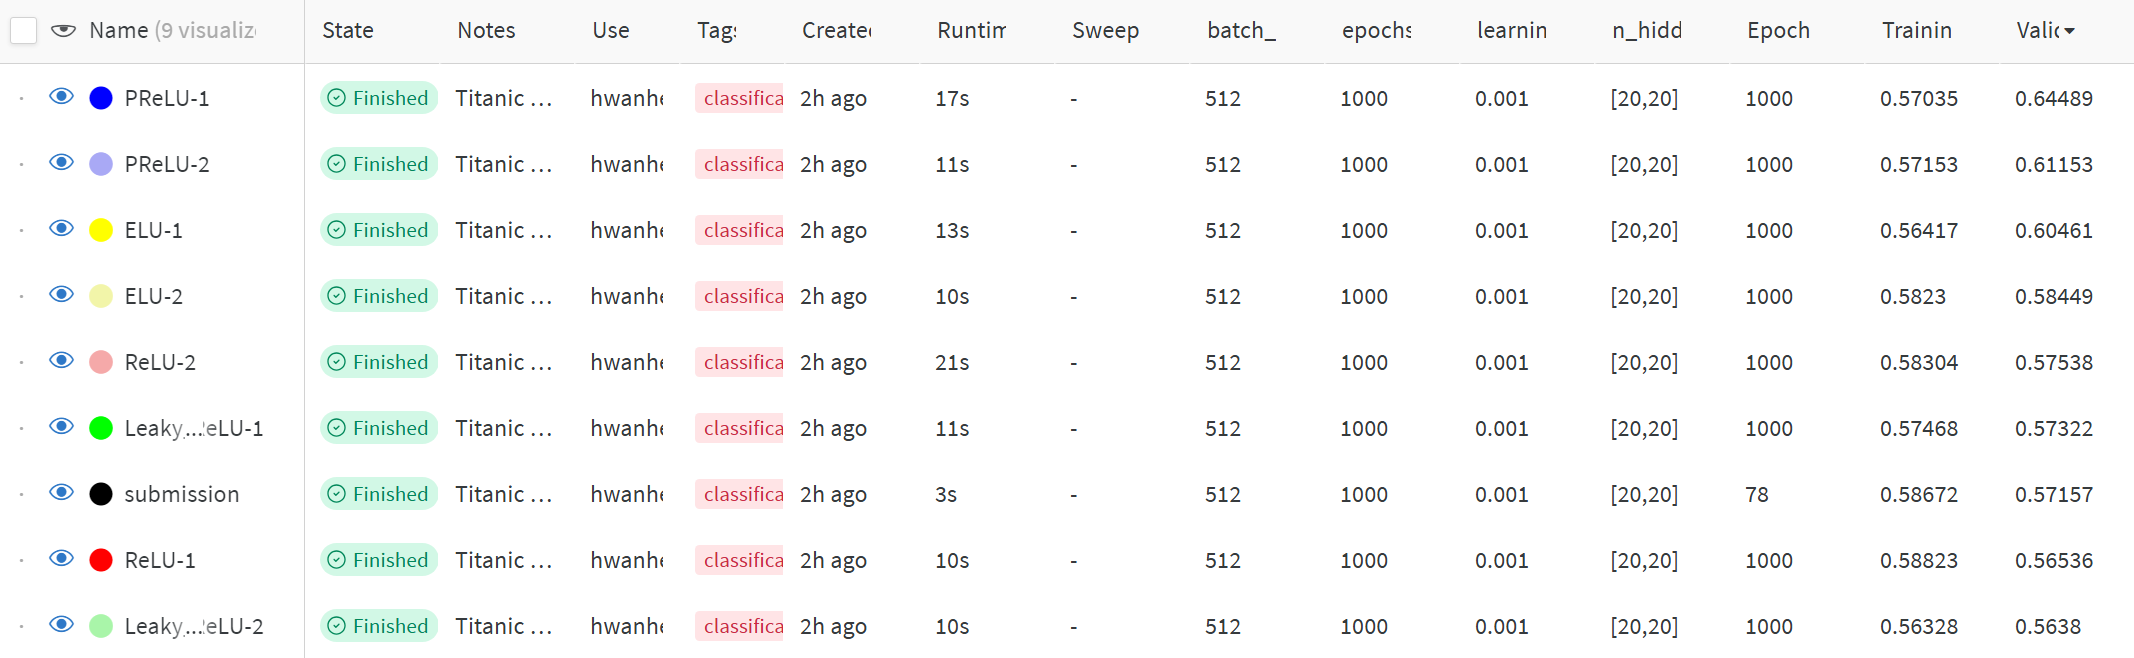

ReLU,  EL, • Leaky Re, 
• PR 를 각각 학습하여 Training loss와 Validation loss가 가장 낮게 나온 Leaky ReLU를 사용eLU

3. 테스트 및 submission.csv 생성
---
1. 각 에포크 후에 검증 데이터로 모델의 성능을 평가하여 검증 손실이 최저일 때 모델 가중치를 저장.
2. 조기 종료 조건을 만족하면 훈련 종료
3. 최적 모델을 로드한 후, 테스트 데이터로 예측 수행.
4. submission.csv 생성

4. submission.csv 제출 및 등수확인
---

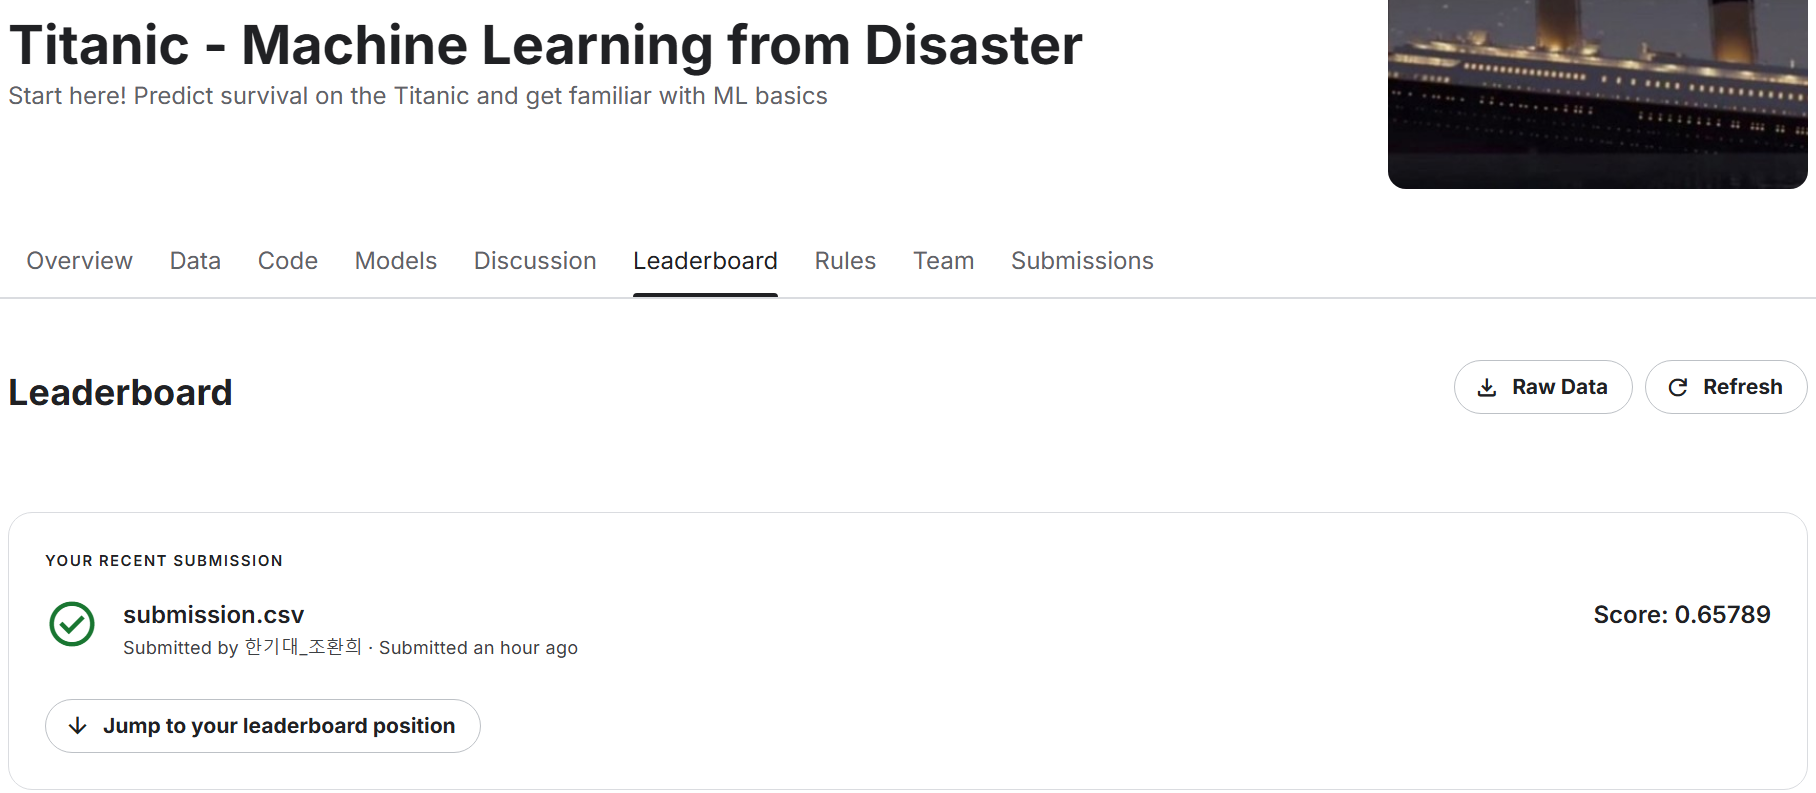


숙제 후기
이번 과제를 통해 데이터 전처리부터 모델 학습, 평가까지의 전 과정을 경험하며 많은 것을 배울 수 있었습니다. 데이터 전처리 과정에서 활용되는 방법들을 분석하면서 수집한 원본 데이터를 학습시키기 적합한 형태로 가공을 해줘야 한다는 것을 실감할 수 있었습니다. 
모델 학습과정에서는 다향한 Activation Function을 비교하여 어느 방법이 이번 학습에 제일 적합한지 시험하는 과정에서  매 학습마다 다른 설정은 동일하지만 Activation Function을 바꿔가며 실험 했을 때, 같은 방법이더라도 Training loss와 Validation loss가 많이 차이 나는 경우가 있었기 때문에 여러 번의 시도를 통해 Activation Function를 Leaky ReLU로 정했습니다. 
데이터 전처리부터 실제 학습 및 테스트 까지 진행해보면서  딥러닝이 어떻게 진행되는지에 대한 포괄적인 이해와 실습을 할 수 있어서 좋았습니다.